# Importing Libraries

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **Standardising Data**

In [32]:
scaler = StandardScaler()##Standard Scaler to later be used for scaling

In [33]:
df_cleaned = pd.read_csv('cleaned_df.csv')##Loading cleaned dataframe
df_scaled = df_cleaned.copy()
df_scaled[df_cleaned.columns] = scaler.fit_transform(df_cleaned[df_cleaned.columns])#standardizing the features
df_scaled.head()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,-0.995767,-1.090837,-0.869595
1,2.710806,1.675897,1.708909
2,-0.201091,0.178116,-0.213112
3,0.012986,0.119491,-0.270523
4,2.615198,1.377098,1.811251


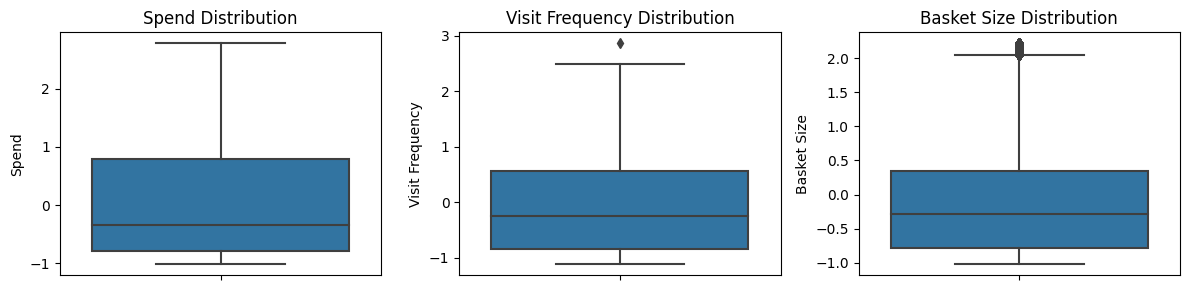

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))  # 3 rows, 1 column

# Plot boxplots for average_monthly_spend, average_monthly_visit_frequency, and average_monthly_basket_size
sns.boxplot(y='average_monthly_spend', data=df_scaled, ax=axes[0])
axes[0].set_title('Spend Distribution')
axes[0].set_ylabel('Spend')

sns.boxplot(y='average_monthly_visit_frequency', data=df_scaled, ax=axes[1])
axes[1].set_title('Visit Frequency Distribution')
axes[1].set_ylabel('Visit Frequency')

sns.boxplot(y='average_monthly_basket_size', data=df_scaled, ax=axes[2])
axes[2].set_title('Basket Size Distribution')
axes[2].set_ylabel('Basket Size')

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig('Scaled.eps', format='eps')

# Display the plots
plt.show()

In [35]:
df_scaled.head()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,-0.995767,-1.090837,-0.869595
1,2.710806,1.675897,1.708909
2,-0.201091,0.178116,-0.213112
3,0.012986,0.119491,-0.270523
4,2.615198,1.377098,1.811251


In [36]:
classify_df = df_scaled ##Creating a copy to be used for the classification step

# **Clustering using Kmeans clustering**

In [37]:
# Define the k-means clustering model with 5 clusters. 5 was chosen based on the question guidelines.
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the data
kmeans.fit(classify_df)
classified_df  = classify_df##classified_df will be used to make a copy containing the cluster column
# Assign the cluster labels to each data point
classified_df['Cluster'] = kmeans.labels_

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [38]:
classified_df.head()

,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Cluster
0,-0.995767,-1.090837,-0.869595,3
1,2.710806,1.675897,1.708909,4
2,-0.201091,0.178116,-0.213112,1
3,0.012986,0.119491,-0.270523,1
4,2.615198,1.377098,1.811251,4


# **Visualization**

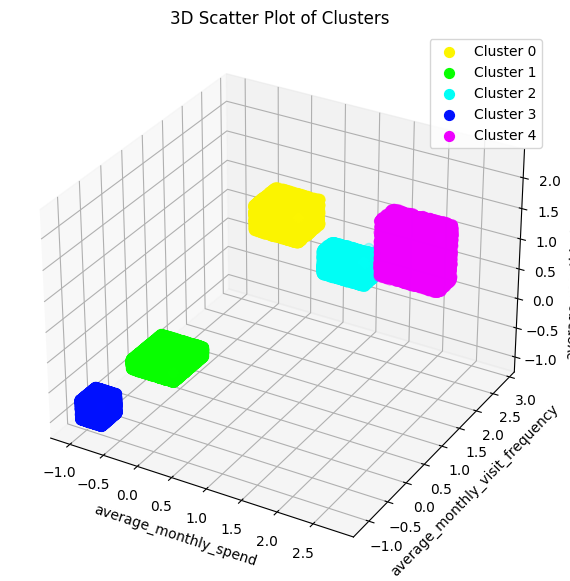

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the colors for each cluster
colors = sns.color_palette("hsv", 5)

# Plot the data points with cluster colors
for cluster in range(5):
    cluster_data = classified_df[classified_df['Cluster'] == cluster]
    ax.scatter(cluster_data['average_monthly_spend'], cluster_data['average_monthly_visit_frequency'], cluster_data['average_monthly_basket_size'], 
               color=colors[cluster], label=f'Cluster {cluster}', s=50)

# Set labels
ax.set_xlabel('average_monthly_spend')
ax.set_ylabel('average_monthly_visit_frequency')
ax.set_zlabel('average_monthly_basket_size')

plt.legend()
plt.title('3D Scatter Plot of Clusters')
plt.show()


In [40]:
classified_df.to_csv('classified_df.csv', index=False)